# Python Project 2 - Diabetes Analysis
Author: Jullieth Castillo Date: 2025-12-10

Overall, gender and race show no meaningful differences in hospital stay duration among diabetic patients. In contrast, age displays a clear pattern, with older patients experiencing longer and more variable stays. These findings suggest that age—not gender or race—is the primary demographic factor influencing hospitalization length in this population.

(101766, 50)
Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

Estadísticas descriptivas por género:
          count  

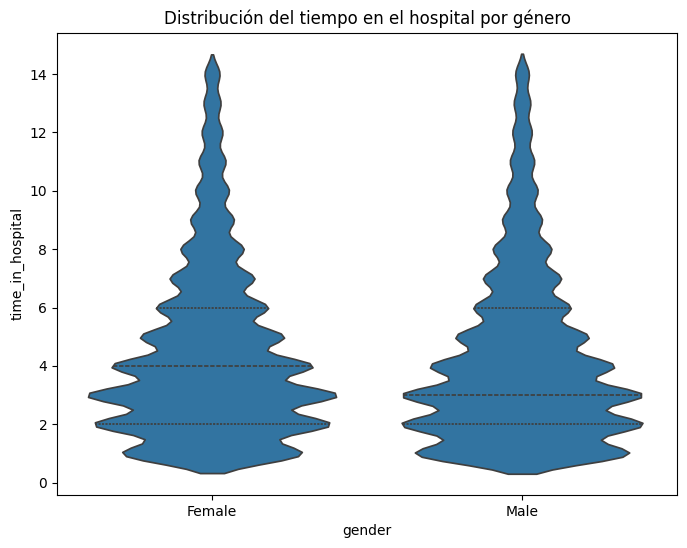

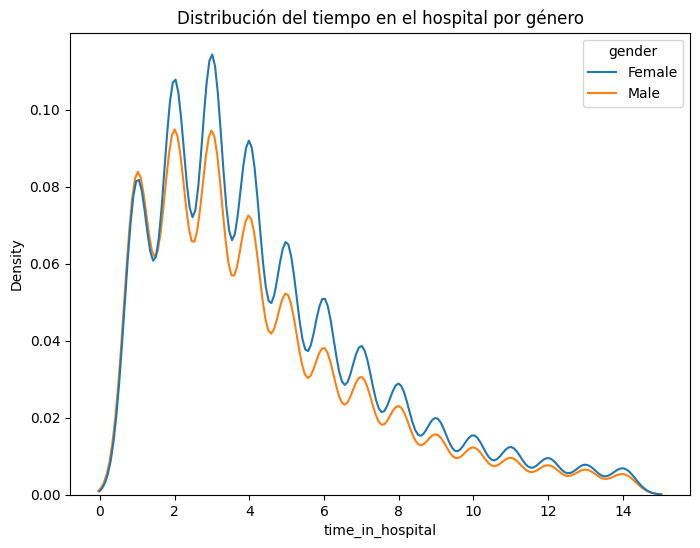

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv"
df = pd.read_csv(url)

print(df.shape)
print(df.columns)

# Convertimos '?' a NaN
df = df.replace('?', np.nan)

# Eliminamos registros con género no definido (dataset incluye algunos 'Unknown/Invalid')
df = df[df['gender'].isin(['Male', 'Female'])]

df['time_in_hospital'] = pd.to_numeric(df['time_in_hospital'], errors='coerce')

group_col = 'gender'
feature = 'time_in_hospital'

stats = df.groupby(group_col)[feature].describe()
print("\nEstadísticas descriptivas por género:")
print(stats)

plt.figure(figsize=(8,6))
sns.violinplot(data=df, x=group_col, y=feature, inner="quartile")
plt.title("Distribución del tiempo en el hospital por género")
plt.show()

plt.figure(figsize=(8,6))
sns.kdeplot(data=df, x=feature, hue=group_col, fill=False)
plt.title("Distribución del tiempo en el hospital por género")
plt.xlabel(feature)
plt.show()


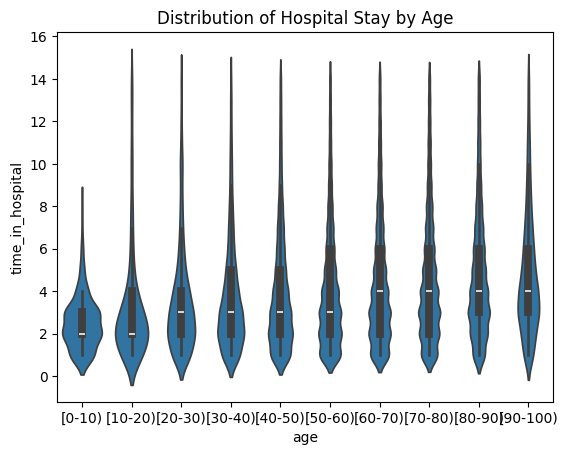

In [8]:
sns.violinplot(data=df, x='age', y='time_in_hospital')
plt.title("Distribution of Hospital Stay by Age")
plt.show()

Descriptive statistics by race:

                   count      mean       std  min  25%  50%  75%   max
race                                                                  
AfricanAmerican  19210.0  4.507860  3.047589  1.0  2.0  4.0  6.0  14.0
Asian              641.0  3.995320  2.937097  1.0  2.0  3.0  5.0  14.0
Caucasian        76099.0  4.385721  2.973847  1.0  2.0  4.0  6.0  14.0
Hispanic          2037.0  4.059892  2.824838  1.0  2.0  3.0  5.0  14.0
Other             1505.0  4.275748  3.038600  1.0  2.0  3.0  6.0  14.0


/tmp/ipython-input-3184354164.py:9: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(data=df, x=group_col, y=feature, join=False)


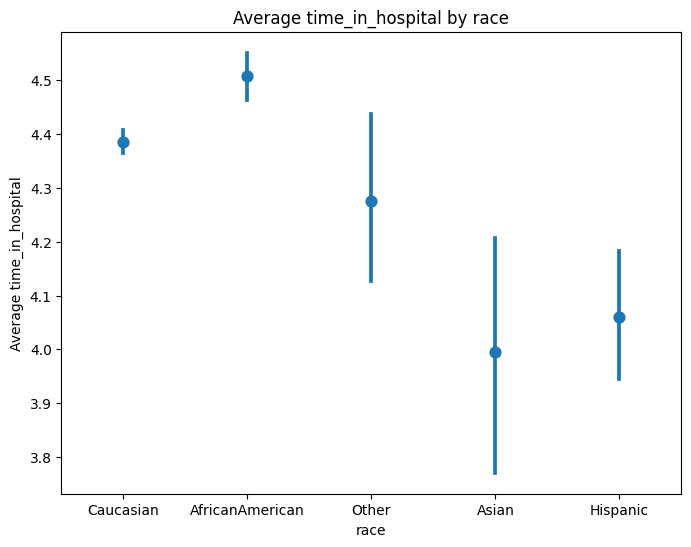

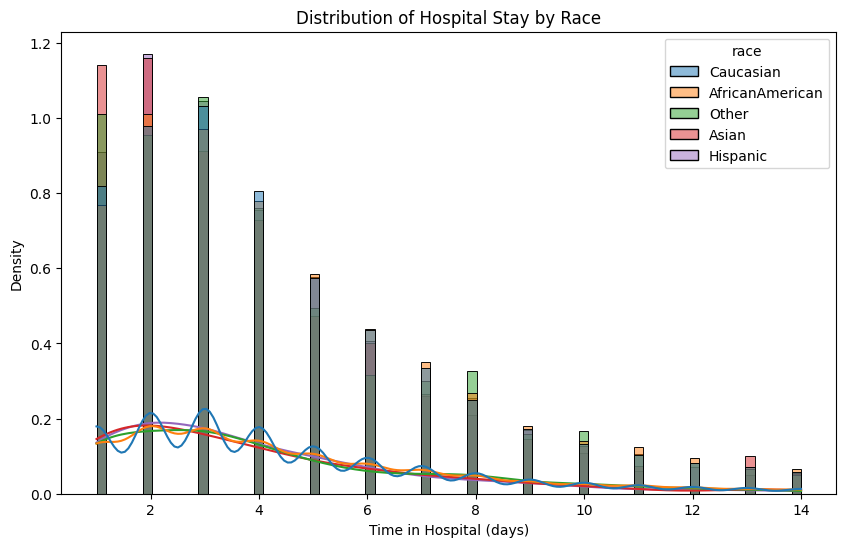

In [19]:
group_col = 'race'
feature = 'time_in_hospital'

stats = df.groupby(group_col)[feature].describe()
print("Descriptive statistics by race:\n")
print(stats)

plt.figure(figsize=(8,6))
sns.pointplot(data=df, x=group_col, y=feature, join=False)
plt.title(f"Average {feature} by {group_col}")
plt.xlabel(group_col)
plt.ylabel(f"Average {feature}")
plt.show()

plt.figure(figsize=(10,6))
sns.histplot(data=df, x=feature, hue=group_col, kde=True, stat="density", common_norm=False)
plt.title("Distribution of Hospital Stay by Race")
plt.xlabel("Time in Hospital (days)")
plt.show()

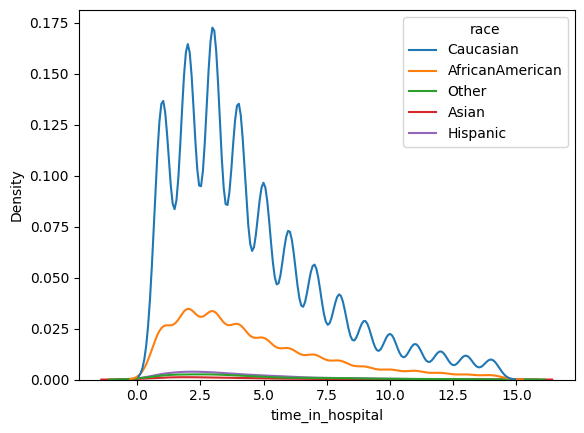

In [10]:
sns.kdeplot(data=df, x='time_in_hospital', hue='race')
plt.show()

/tmp/ipython-input-2335967777.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats_age = df.groupby('age')['time_in_hospital'].describe()
/tmp/ipython-input-2335967777.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='age', y='time_in_hospital', ci=None)


            count      mean       std  min  25%  50%  75%   max
age                                                            
[0-10)      161.0  2.546584  1.274511  1.0  2.0  2.0  3.0   8.0
[10-20)     691.0  3.191027  2.612341  1.0  2.0  2.0  4.0  14.0
[20-30)    1657.0  3.564876  2.547528  1.0  2.0  3.0  4.0  14.0
[30-40)    3775.0  3.799735  2.688303  1.0  2.0  3.0  5.0  14.0
[40-50)    9685.0  4.039649  2.888374  1.0  2.0  3.0  5.0  14.0
[50-60)   17256.0  4.125753  2.917638  1.0  2.0  3.0  6.0  14.0
[60-70)   22482.0  4.382395  3.003412  1.0  2.0  4.0  6.0  14.0
[70-80)   26066.0  4.590885  3.044634  1.0  2.0  4.0  6.0  14.0
[80-90)   17197.0  4.808629  3.031156  1.0  3.0  4.0  6.0  14.0
[90-100)   2793.0  4.755818  2.863631  1.0  3.0  4.0  6.0  14.0


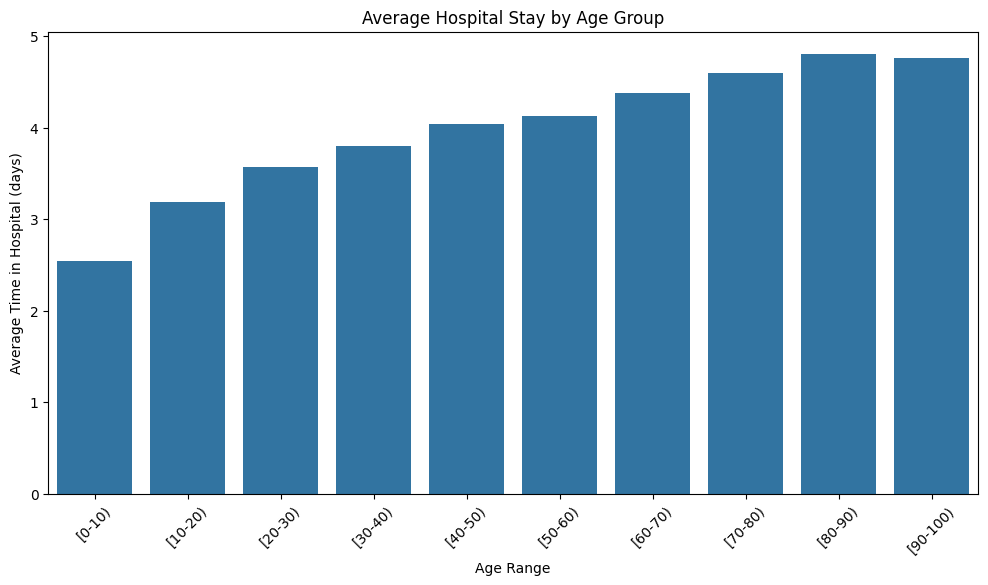

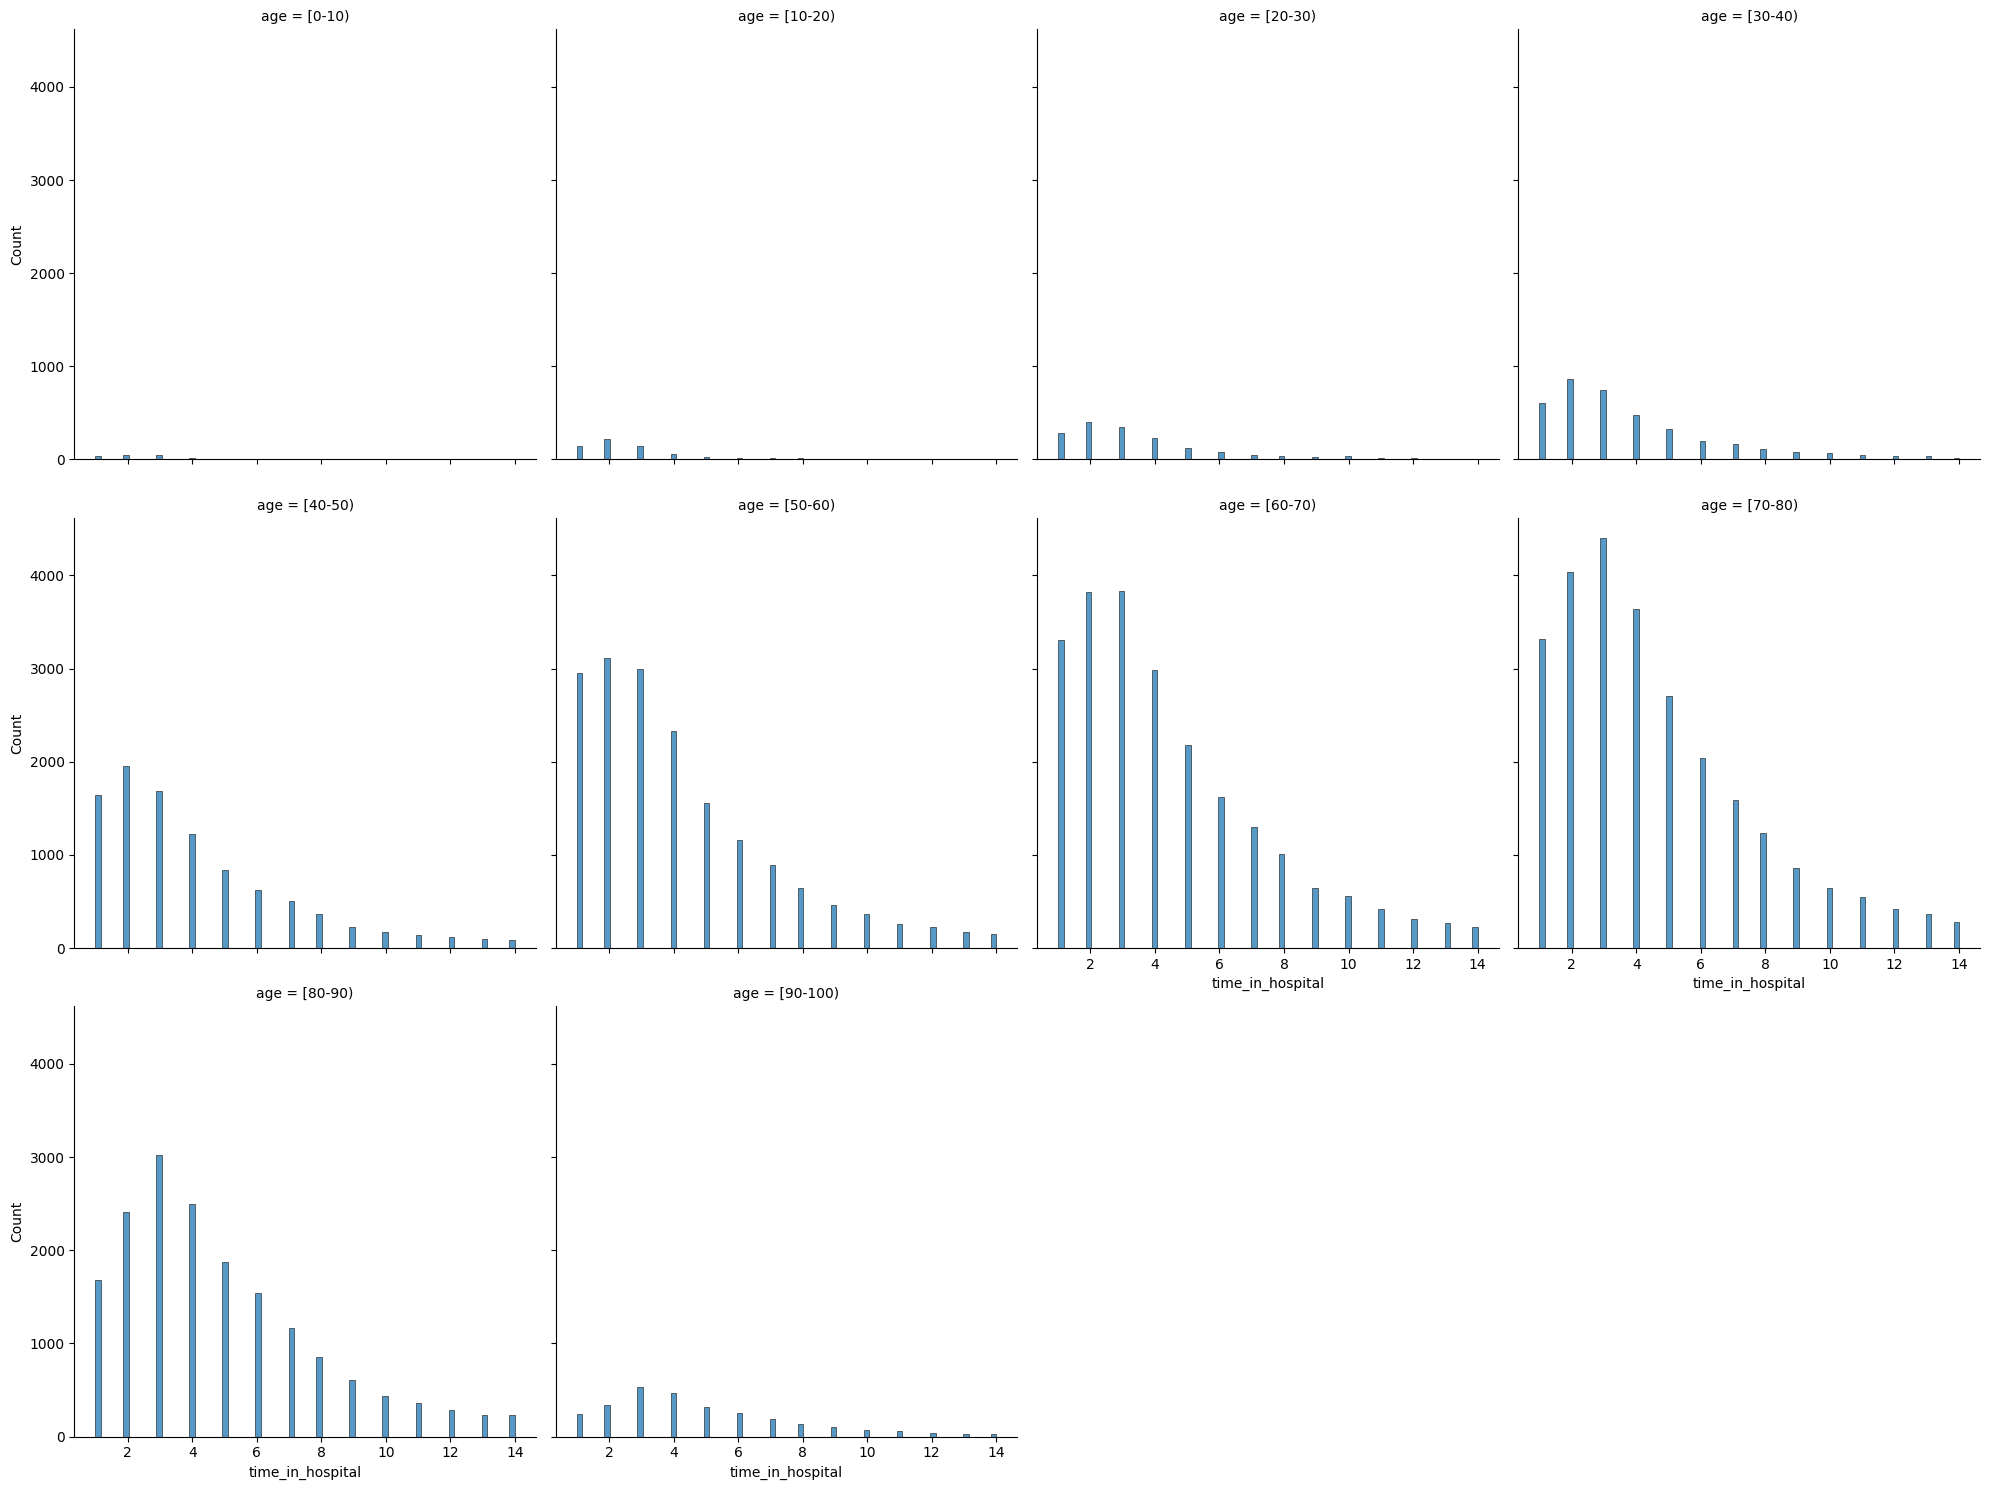

In [21]:
age_order = ["[0-10)", "[10-20)", "[20-30)", "[30-40)", "[40-50)",
             "[50-60)", "[60-70)", "[70-80)", "[80-90)", "[90-100)"]

df['age'] = pd.Categorical(df['age'], categories=age_order, ordered=True)

stats_age = df.groupby('age')['time_in_hospital'].describe()
print(stats_age)

plt.figure(figsize=(12,6))
sns.barplot(data=df, x='age', y='time_in_hospital', ci=None)
plt.title("Average Hospital Stay by Age Group")
plt.xlabel("Age Range")
plt.ylabel("Average Time in Hospital (days)")
plt.xticks(rotation=45)
plt.show()

sns.displot(df, x='time_in_hospital', col='age', col_wrap=4)